<a href="https://colab.research.google.com/github/meet47/RecommenderSystem-/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving u.data to u.data


In [ ]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [ ]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
df.shape

(100003, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [ ]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [ ]:
df['rating'].value_counts()

4    34174
3    27145
5    21203
2    11370
1     6111
Name: rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6f7a196e10>,
 [Text(0.5246830126516575, 0.9668028424838131, '4'),
  Text(-1.0889779450637544, 0.1553287969589765, '3'),
  Text(-0.21166046907730143, -1.0794442300693339, '5'),
  Text(0.8114676615216527, -0.742644083195026, '2'),
  Text(1.0797918569963563, -0.2098798360118491, '1')])

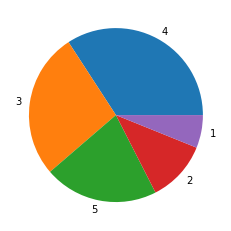

In [ ]:
plt.pie(x=df['rating'].value_counts(), labels=df['rating'].value_counts().index)

In [ ]:
uploaded = files.upload()

Saving Movie_Id_Titles.csv to Movie_Id_Titles.csv


In [ ]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv')

In [ ]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
df = pd.merge(left=df, right=movie_titles, on='item_id')

In [ ]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [ ]:
df['title'].value_counts()

Star Wars (1977)                   584
Contact (1997)                     509
Fargo (1996)                       508
Return of the Jedi (1983)          507
Liar Liar (1997)                   485
                                  ... 
Leopard Son, The (1996)              1
Stefano Quantestorie (1993)          1
Quartier Mozart (1992)               1
Reluctant Debutante, The (1958)      1
Dadetown (1995)                      1
Name: title, Length: 1664, dtype: int64

In [ ]:
df['timestamp'].max()

893286638

In [ ]:
df[df['timestamp'] == 893286638]['rating'].max()

4

In [ ]:
sns.set_style('white')

In [ ]:
df['title'].value_counts().index

Index(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)',
       ...
       'Lashou shentan (1992)', 'Raw Deal (1948)', 'Big One, The (1997)',
       'Someone Else's America (1995)', 'Liebelei (1933)',
       'Leopard Son, The (1996)', 'Stefano Quantestorie (1993)',
       'Quartier Mozart (1992)', 'Reluctant Debutante, The (1958)',
       'Dadetown (1995)'],
      dtype='object', length=1664)

In [ ]:
df[df['title'] == 'Star Wars (1977)']['rating'].mean()

4.359589041095891

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [ ]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [ ]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


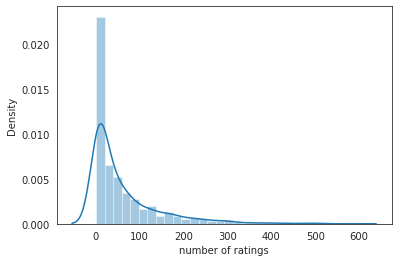

In [ ]:
sns.distplot(ratings['number of ratings'], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


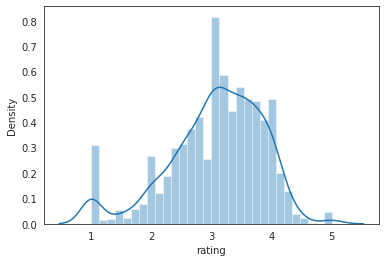

In [ ]:
sns.distplot(ratings['rating'], bins=30)

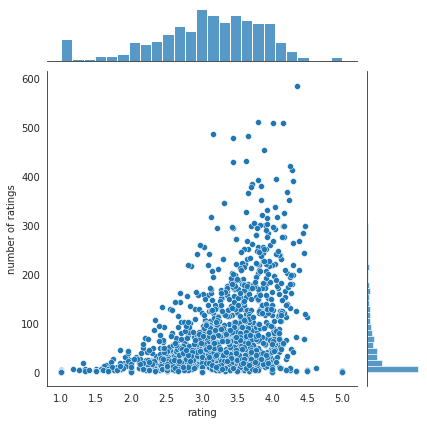

In [ ]:
sns.jointplot(x='rating', y='number of ratings', data=ratings)

In [ ]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [ ]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [ ]:
liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [ ]:
similar_starwars = moviemat.corrwith(starwars_user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_liarliar = moviemat.corrwith(liarliar_user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
corr_starwars = pd.DataFrame(similar_starwars, columns=['Correlation'])
corr_liarliar = pd.DataFrame(similar_liarliar, columns=['Correlation'])

In [ ]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


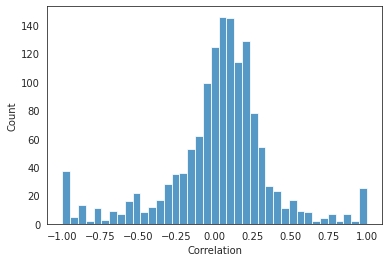

In [ ]:
sns.histplot(x='Correlation', data=corr_starwars)

In [ ]:
corr_starwars['Correlation'].isnull().sum()

254

In [ ]:
corr_starwars.dropna(inplace=True)

In [ ]:
corr_starwars['Correlation'].isnull().sum()

0

In [ ]:
corr_liarliar['Correlation'].isnull().sum()

289

In [ ]:
corr_liarliar.dropna(inplace=True)

In [ ]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])

In [ ]:
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [ ]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [ ]:
corr_liarliar = corr_liarliar.join(ratings['number of ratings'])

In [ ]:
corr_liarliar.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [ ]:
corr_liarliar.sort_values('Correlation')

,Correlation,number of ratings
title,,
Germinal (1993),-1.0,4
When Night Is Falling (1995),-1.0,5
Lamerica (1994),-1.0,4
"Quiet Room, The (1996)",-1.0,3
"Big Squeeze, The (1996)",-1.0,4
...,...,...
Liar Liar (1997),1.0,485
Mina Tannenbaum (1994),1.0,6
Johnny 100 Pesos (1993),1.0,2


In [ ]:
corr_liarliar[corr_liarliar['number of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
